In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("mamographic.csv",sep=',', na_values=["?"])
print(file.tail())

     BI-RADS   Age  Shape  Margin  Density  Severity
956      4.0  47.0    2.0     1.0      3.0         0
957      4.0  56.0    4.0     5.0      3.0         1
958      4.0  64.0    4.0     5.0      3.0         0
959      5.0  66.0    4.0     5.0      3.0         1
960      4.0  62.0    3.0     3.0      3.0         0


In [2]:
file.isnull().values.any()

True

In [4]:
file.columns[file.isnull().any()]

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density'], dtype='object')

In [5]:
file.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.296142,55.487448,2.721505,2.796276,2.910734,0.463059
std,0.706291,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [12]:
file['BI-RADS'].fillna(file['BI-RADS'].mean(),inplace=True)
file['Age'].fillna(file['Age'].mean(),inplace=True)
file['Shape'].fillna(file['Shape'].mean(),inplace=True)
file['Margin'].fillna(file['Margin'].mean(),inplace=True)
file['Density'].fillna(file['Density'].mean(),inplace=True)

In [13]:
file.isnull().values.any()

False

In [14]:
file.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.000000,1
1,4.0,43.0,1.0,1.0,2.910734,1
2,5.0,58.0,4.0,5.0,3.000000,1
3,4.0,28.0,1.0,1.0,3.000000,0
4,5.0,74.0,1.0,5.0,2.910734,1


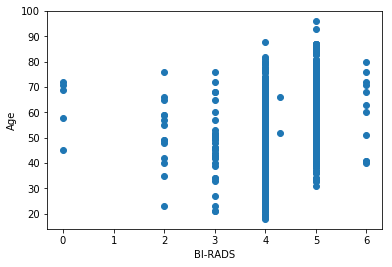

In [15]:
plt.scatter(file['BI-RADS'],file['Age'])
plt.xlabel('BI-RADS')
plt.ylabel('Age')
plt.show()

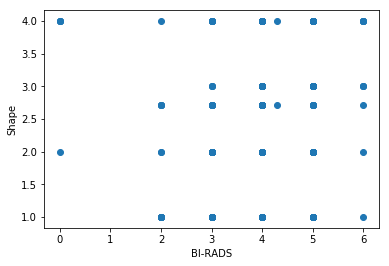

In [16]:
plt.scatter(file['BI-RADS'],file['Shape'])
plt.xlabel('BI-RADS')
plt.ylabel('Shape')
plt.show()

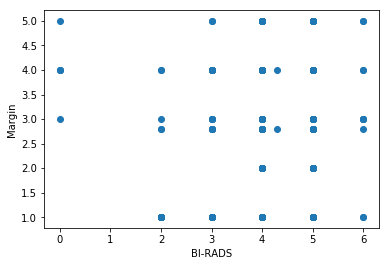

In [17]:
plt.scatter(file['BI-RADS'],file['Margin'])
plt.xlabel('BI-RADS')
plt.ylabel('Margin')
plt.show()

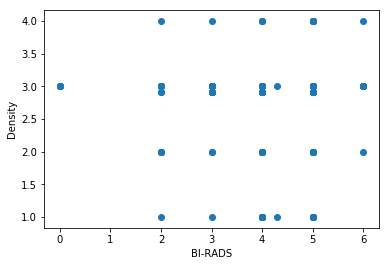

In [18]:
plt.scatter(file['BI-RADS'],file['Density'])
plt.xlabel('BI-RADS')
plt.ylabel('Density')
plt.show()

In [19]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(file,test_size=0.2)
features_train=train[['BI-RADS','Age','Shape','Margin','Density']]
features_test = test[['BI-RADS','Age','Shape','Margin','Density']]
labels_train = train.Severity
labels_test = test.Severity
print(train.shape)
print(test.shape)
print(labels_test.head())

(768, 6)
(193, 6)
935    1
163    0
11     1
285    1
196    0
Name: Severity, dtype: int64


C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2)]
for name,clf in zip(names,classifiers):
    clf.fit(features_train,labels_train)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.80829015544
Accuracy: 0.79792746114
Accuracy: 0.80829015544
Accuracy: 0.823834196891
Accuracy: 0.818652849741
Accuracy: 0.777202072539
Accuracy: 0.79274611399
Accuracy: 0.777202072539
Accuracy: 0.772020725389
Accuracy: 0.813471502591
Accuracy: 0.777202072539


In [21]:
from sklearn.preprocessing import Imputer
values = file.values
imputer = Imputer()
transformed_values = imputer.fit_transform(values)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
names = ['GaussianNB','SVM Linear','SVM Rbf','SVM Poly','SVM Linear C','SVM Rbf C','SVM Poly C','Decision tree','Decision tree with minsample','k neighbors','k neighbors with n']
classifiers = [GaussianNB(),
               SVC(kernel="linear"),
               SVC(kernel="rbf"),
               SVC(kernel="poly"),
               SVC(kernel="linear", C=1000),
               SVC(kernel="rbf", C=1000),
               SVC(kernel="poly", C=1000),
               DecisionTreeClassifier(),
               DecisionTreeClassifier(min_samples_split=5),
               KNeighborsClassifier(),
               KNeighborsClassifier(n_neighbors=2)]
for name,clf in zip(names,classifiers):
    clf.fit(features_train,labels_train)
    print("Accuracy:",clf.score(features_test,labels_test))

Accuracy: 0.80829015544
Accuracy: 0.79792746114
Accuracy: 0.80829015544
Accuracy: 0.823834196891
Accuracy: 0.818652849741
Accuracy: 0.777202072539
Accuracy: 0.79274611399
Accuracy: 0.782383419689
Accuracy: 0.766839378238
Accuracy: 0.813471502591
Accuracy: 0.777202072539
